In [1]:
gerber = read.csv('gerber.csv')

In [2]:
str(gerber)

'data.frame':	344084 obs. of  8 variables:
 $ sex      : int  0 1 1 1 0 1 0 0 1 0 ...
 $ yob      : int  1941 1947 1982 1950 1951 1959 1956 1981 1968 1967 ...
 $ voting   : int  0 0 1 1 1 1 1 0 0 0 ...
 $ hawthorne: int  0 0 1 1 1 0 0 0 0 0 ...
 $ civicduty: int  1 1 0 0 0 0 0 0 0 0 ...
 $ neighbors: int  0 0 0 0 0 0 0 0 0 0 ...
 $ self     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ control  : int  0 0 0 0 0 1 1 1 1 1 ...


In [3]:
table(gerber$voting)/nrow(gerber)


        0         1 
0.6841004 0.3158996 

In [10]:
gerberLog = glm(voting ~  civicduty + hawthorne + self + neighbors, data = gerber, family=binomial)
summary(gerberLog)


Call:
glm(formula = voting ~ civicduty + hawthorne + self + neighbors, 
    family = binomial, data = gerber)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9744  -0.8691  -0.8389   1.4586   1.5590  

Coefficients:
             Estimate Std. Error  z value Pr(>|z|)    
(Intercept) -0.863358   0.005006 -172.459  < 2e-16 ***
civicduty    0.084368   0.012100    6.972 3.12e-12 ***
hawthorne    0.120477   0.012037   10.009  < 2e-16 ***
self         0.222937   0.011867   18.786  < 2e-16 ***
neighbors    0.365092   0.011679   31.260  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 429238  on 344083  degrees of freedom
Residual deviance: 428090  on 344079  degrees of freedom
AIC: 428100

Number of Fisher Scoring iterations: 4


In [11]:
# Predictions on the test set
gerberLogPredict = predict(gerberLog, type="response")

# Confusion matrix with threshold of 0.3
table(gerber$voting, gerberLogPredict > 0.3)


   
     FALSE   TRUE
  0 134513 100875
  1  56730  51966

In [13]:
(134513 + 51966)/ nrow(gerber)

[1] 0.5419578

In [12]:
# Confusion matrix with threshold of 0.5
table(gerber$voting, gerberLogPredict > 0.5)


   
     FALSE
  0 235388
  1 108696

In [9]:
(233590 + 1027)/ nrow(gerber)

[1] 0.6818597

# Tree

In [15]:
# Load necessary libraries
library(rpart)
library(rpart.plot)
CARTmodel = rpart(voting ~ civicduty + hawthorne + self + neighbors, data=gerber)

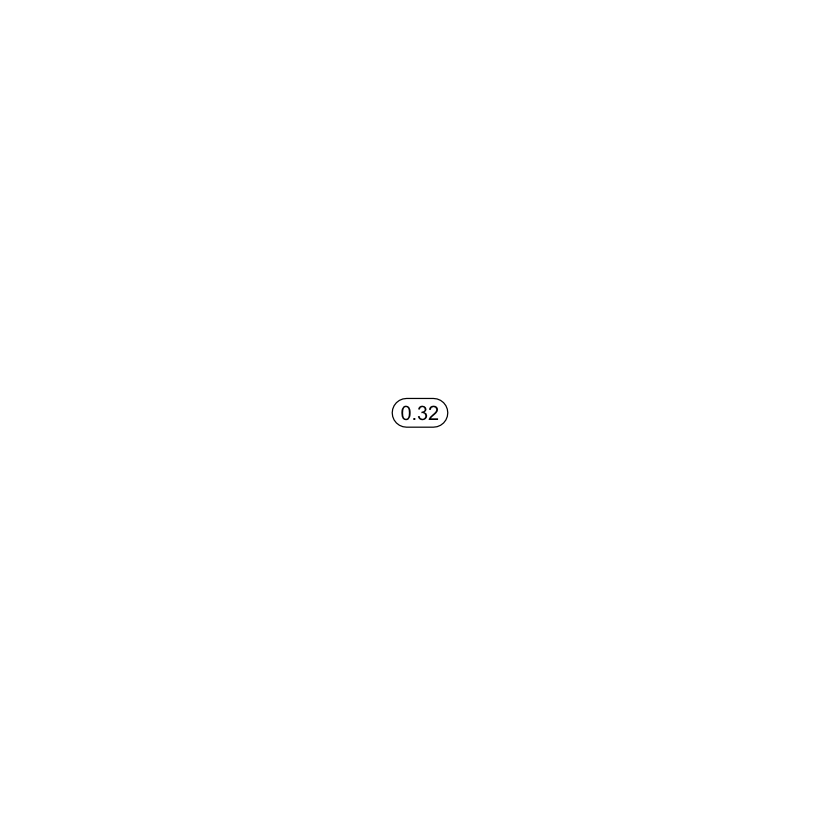

In [16]:
prp(CARTmodel)

In [17]:
CARTmodel2 = rpart(voting ~ civicduty + hawthorne + self + neighbors, data=gerber, cp=0.0)

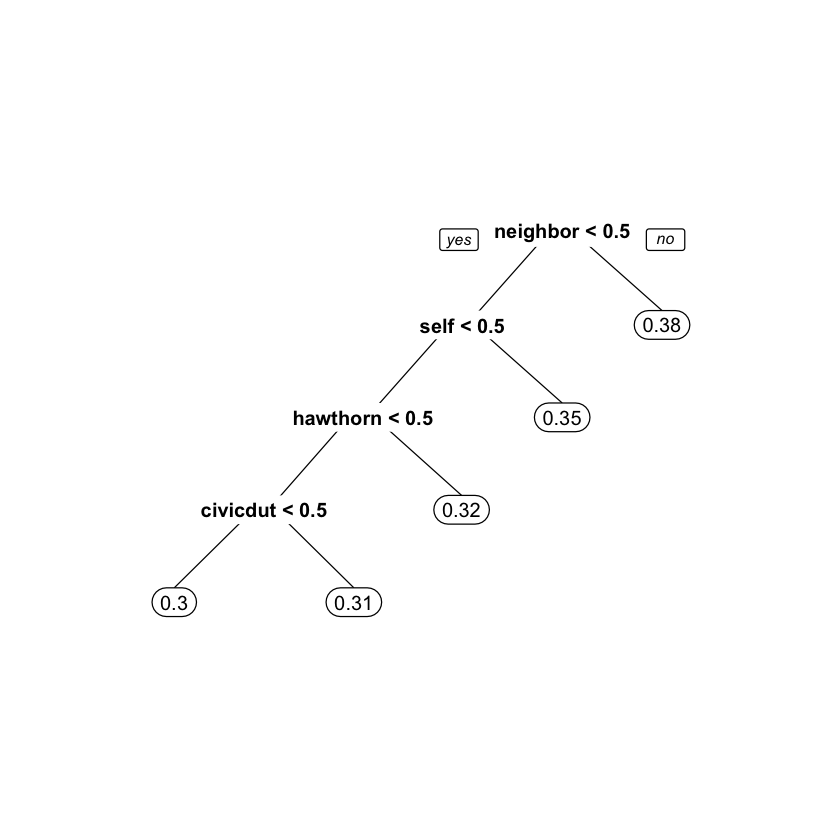

In [19]:
prp(CARTmodel2)

In [22]:
CARTmodel3 = rpart(voting ~ civicduty + hawthorne + self + neighbors + sex, data=gerber, cp=0.0)

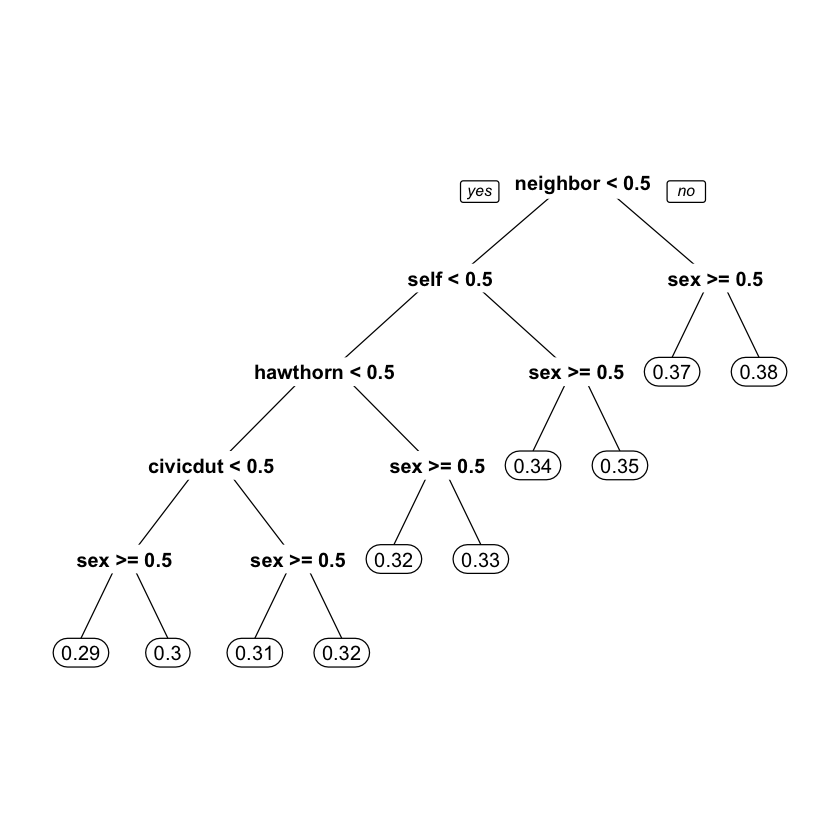

In [23]:
prp(CARTmodel3)

In [24]:
CARTmodel4 = rpart(voting ~ control, data=gerber, cp=0.0)
CARTmodel5 = rpart(voting ~ control + sex, data=gerber, cp=0.0)

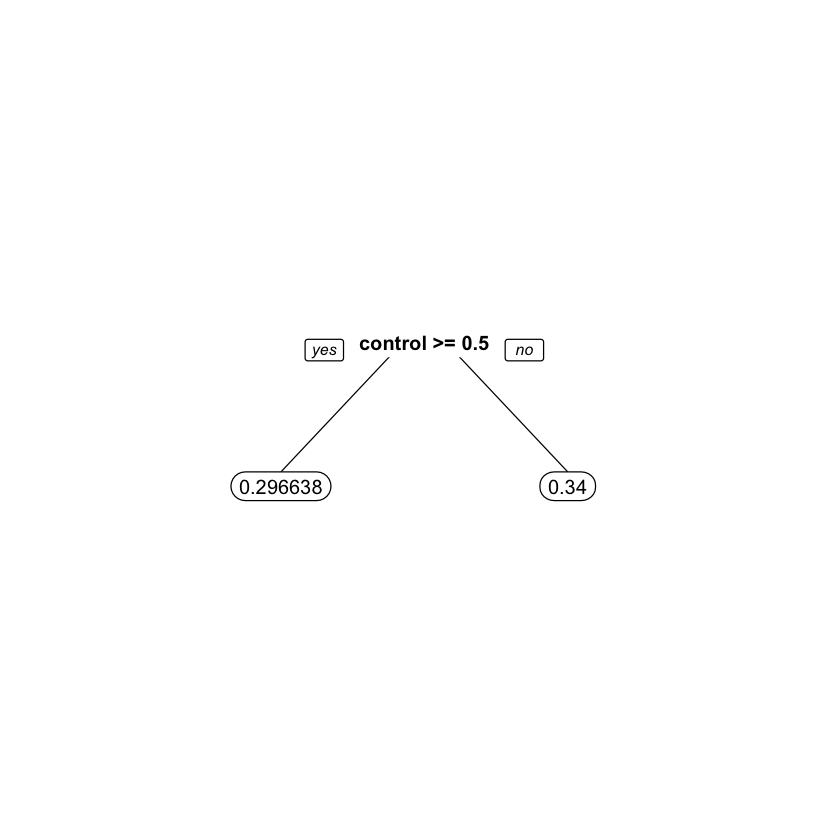

In [25]:
prp(CARTmodel4, digits = 6)

In [26]:
abs(0.34 - 0.296638)

[1] 0.043362

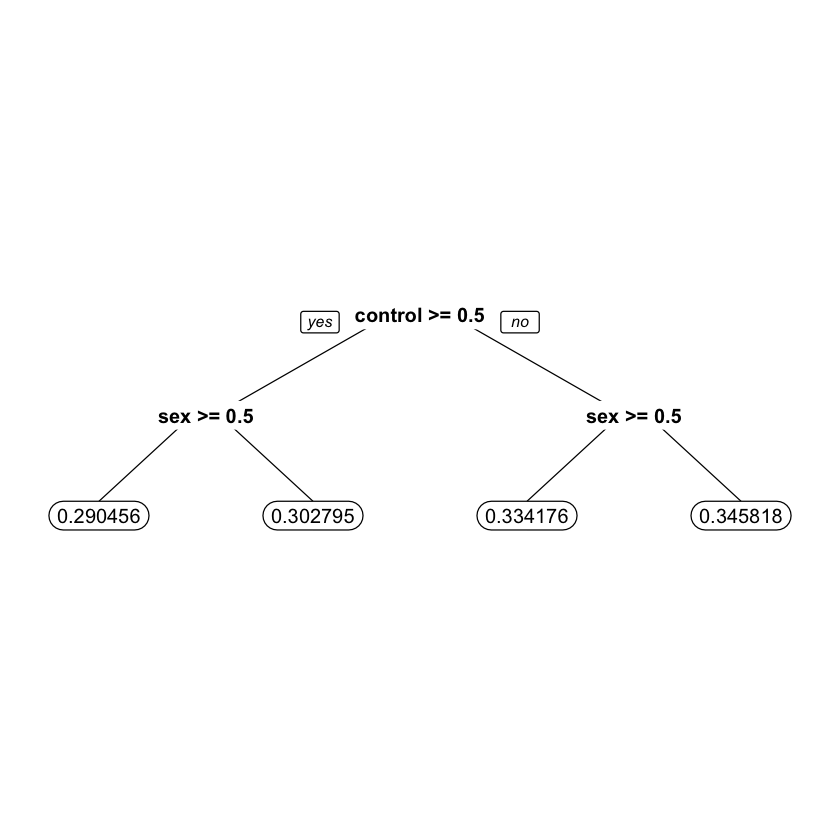

In [28]:
prp(CARTmodel5, digits = 6)

In [29]:
gerberLog2 = glm(voting ~  sex + control, data = gerber, family=binomial)
summary(gerberLog2)


Call:
glm(formula = voting ~ sex + control, family = binomial, data = gerber)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9220  -0.9012  -0.8290   1.4564   1.5717  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.635538   0.006511 -97.616  < 2e-16 ***
sex         -0.055791   0.007343  -7.597 3.02e-14 ***
control     -0.200142   0.007364 -27.179  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 429238  on 344083  degrees of freedom
Residual deviance: 428443  on 344081  degrees of freedom
AIC: 428449

Number of Fisher Scoring iterations: 4


In [31]:
Possibilities = data.frame(sex=c(0,0,1,1),control=c(0,1,0,1))
predict(gerberLog2, newdata=Possibilities, type="response")

  

1         2         3         4 
0.3462559 0.3024455 0.3337375 0.2908065

In [32]:
0.290456 - 0.290806

[1] -0.00035

In [33]:
LogModel2 = glm(voting ~ sex + control + sex:control, data=gerber, family="binomial")

In [34]:
summary(LogModel2)


Call:
glm(formula = voting ~ sex + control + sex:control, family = "binomial", 
    data = gerber)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9213  -0.9019  -0.8284   1.4573   1.5724  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.637471   0.007603 -83.843  < 2e-16 ***
sex         -0.051888   0.010801  -4.804 1.55e-06 ***
control     -0.196553   0.010356 -18.980  < 2e-16 ***
sex:control -0.007259   0.014729  -0.493    0.622    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 429238  on 344083  degrees of freedom
Residual deviance: 428442  on 344080  degrees of freedom
AIC: 428450

Number of Fisher Scoring iterations: 4


In [35]:
predict(LogModel2, newdata=Possibilities, type="response")

1         2         3         4 
0.3458183 0.3027947 0.3341757 0.2904558

In [36]:
0.290456 - 0.290455779247705

[1] 2.207523e-07